# Data Exploration and Preprocessing 

Loading the required libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
import joblib

Loading the csv files as pandas dataframe

In [3]:
df = pd.read_csv("MLE-Assignment.csv")

In [4]:
# checking the shape of our data
df.shape

(500, 450)

In [5]:
# showing the first 5 rows

df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [6]:
# overall info
df.info()

# randgeIndex: number of rows 
# Columns: shows the columns of df 
# dtype: data types of columns. Here, the first col "hsi_id" has data type object
# all other cols have datatype float54

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


### Checking missing (null) values 

In [7]:
# Checking for any missing values present in our dataset

# the variable missing_values stores the number of missing values in the dataframe
missing_values = df.isnull().sum().sum()

print("Number of missing values in the dataframe - ",missing_values)

Number of missing values in the dataframe -  0


We don't have any missing values. So, we have one less thing to worry about : D 

## Dataset details 

- The shape of our dataset is (500, 450), ie, it has 500 rows, and each row is represented as a 450 sized array. 
- The first col contains the hsi_id, and the last col contains the target variable (vomitoxin_ppb)
- The columns from 0 to 447 represent the light reflected within a specific wavelength range. This portion of the dataset will be used to predict the target variable. 

Divide the dataset into features and target variable. 

In [8]:
# exclude first (hsi_id) and last col (target variable) in X
X , y = df.iloc[:, 1:-1], df.iloc[:,-1] 

## Visualizing the features

**What does each feature represent?**

- In hyperspectral data, each feature represents the spectral reflectance data of corn samples across multiple wavelength bands. 
- Each feature corresponds to a differet value of wavelength. 
- In the data, we are not given the values of the wavelength that each feature are related to. 


###  Mean reflectance across features

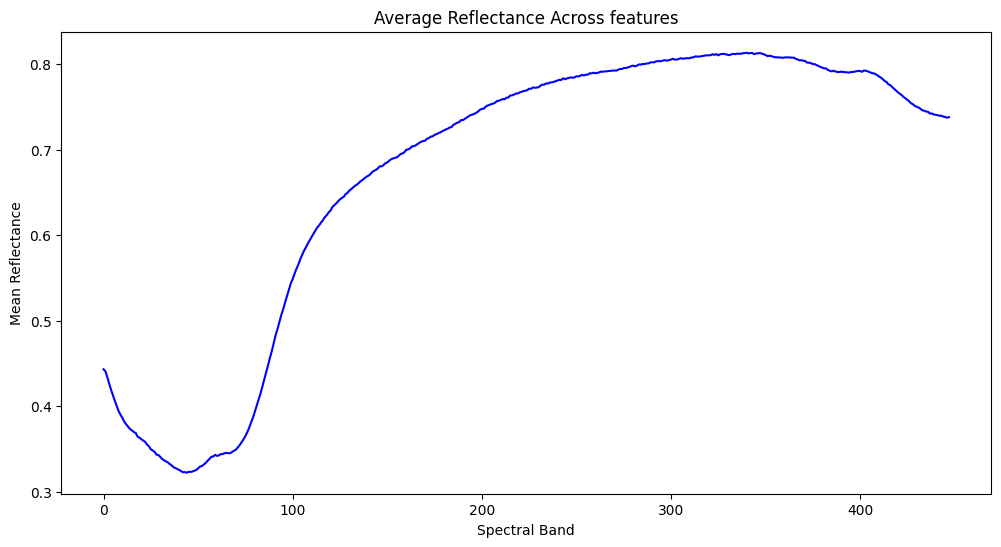

In [9]:
mean_spectrum = X.mean()  # Mean reflectance across samples
plt.figure(figsize=(12, 6))
plt.plot(range(len(mean_spectrum)), mean_spectrum, color="blue")
plt.xlabel("Spectral Band")
plt.ylabel("Mean Reflectance")
plt.title("Average Reflectance Across features")
plt.show()

### Variance across each features

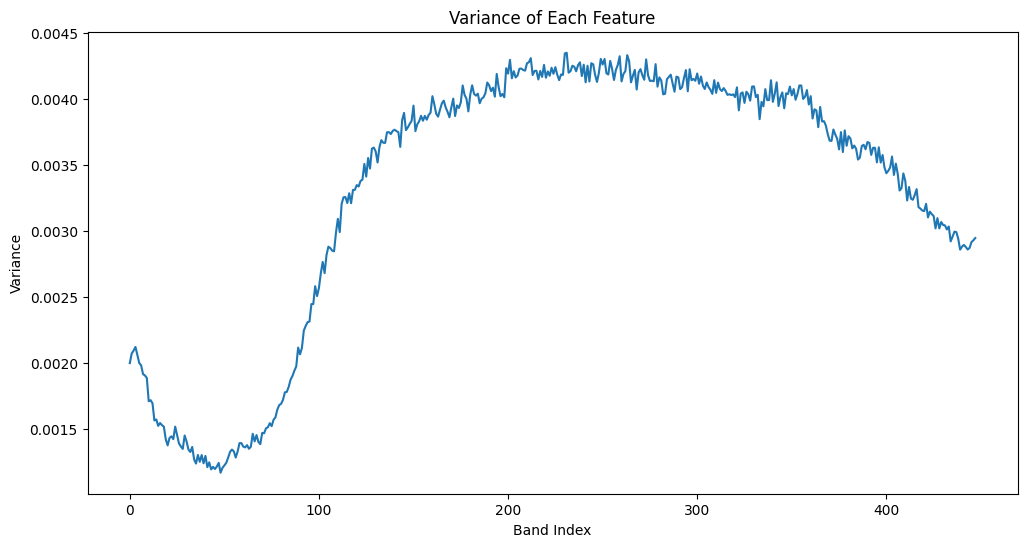

In [10]:
band_variance = X.var()

plt.figure(figsize=(12, 6))
plt.plot(range(len(band_variance)), band_variance.values)
plt.title('Variance of Each Feature')
plt.xlabel('Band Index')
plt.ylabel('Variance')
plt.show()

Findings from the above graphs - 

- We see similar pattern while visualising both the average and variance across features. 
- The variance curve has more noise, which is expected as variance calculation is more effected by noise. It uses square in it's calculation. 
- The features with high vairance are generally more informative to predict our target variable

### How are the features correlated with each other? 

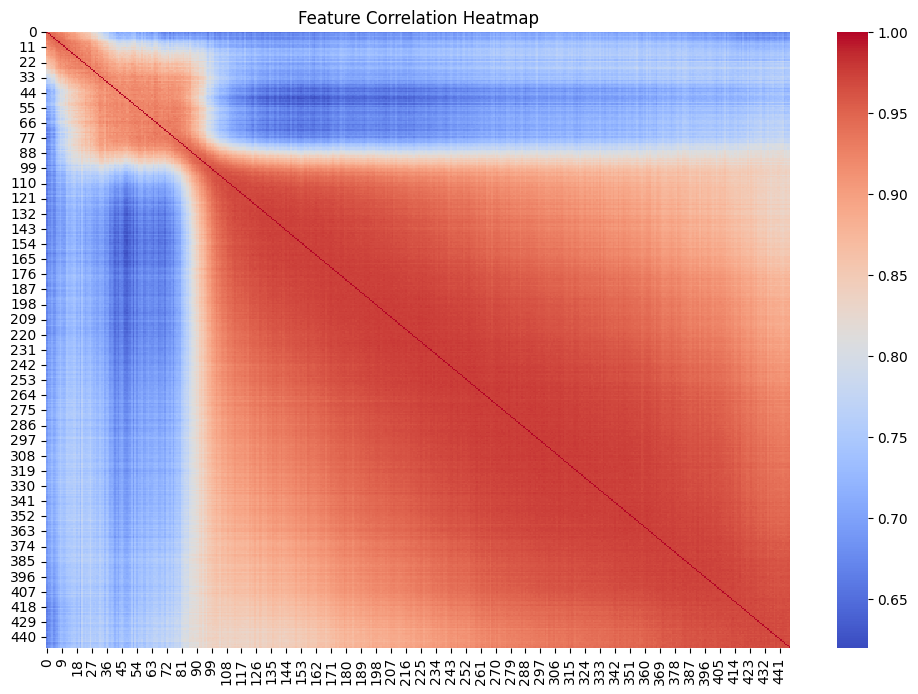

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

- From the above graph, we can infer that there is a strong correlation amonst various features present in our dataset. 
- This also hints that we might not need to use all our features in predicting the target variable. 

## Visualizing the target variable 

- deoxynivalenol (DON) is a mycotoxin which commonly infect grains like corn, wheat, and barley.
- It is a significant concern in food safety because it can be toxic to both humans and animals if consumed in high amounts
- It is expressed in parts per billion (ppb)
- As mentioned [here](https://www.vicam.com/markets/corn-maize#:~:text=Global%20regulations%20set%20limits%20for,and%2060%20ppb%20of%20zearalenone.), the safe range is < 750. 

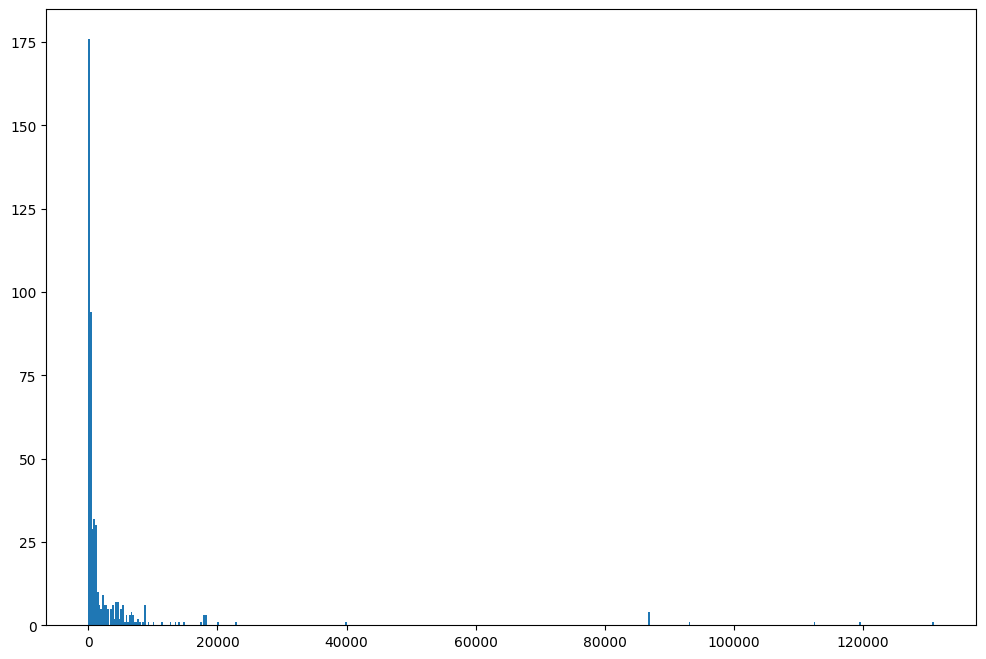

In [13]:
# the distribution of the target variable 

plt.figure(figsize = (12,8))
plt.hist(y, bins=500); plt.show()

From the graph above, we can see that although most of the values are concentrated on the left side, there are some outliers in the dataset. 

In [14]:
y.describe()

count       500.000000
mean       3410.006000
std       13095.803483
min           0.000000
25%         137.500000
50%         500.000000
75%        1700.000000
max      131000.000000
Name: vomitoxin_ppb, dtype: float64

In [15]:
y.quantile(0.95)

8919.999999999982

From the above two tables, we can see that - 
- 75% of the values of the target variable are less than 1700.  
- 95% of values of the target variable are less than 8920. 
- The maximum value if 131000 (which clearly in an outlier)

### Let's look at the outlier data in more detail 

In [16]:
# filter out all the values where 

data_outlier_mask = df['vomitoxin_ppb'] > 20000

data_outlier_mask.sum()

10

We have 10 values where we observe high values of vomitoxin_ppb (>20,000)

### A deep dive into how the features of samples in data_outlier are different from the remaining samples

In [17]:
data_outlier = X[data_outlier_mask]

data_normal = X[~data_outlier_mask]

print(data_outlier.shape)
print(data_normal.shape)

(10, 448)
(490, 448)


Text(0.5, 1.0, 'Average Reflectance Across features')

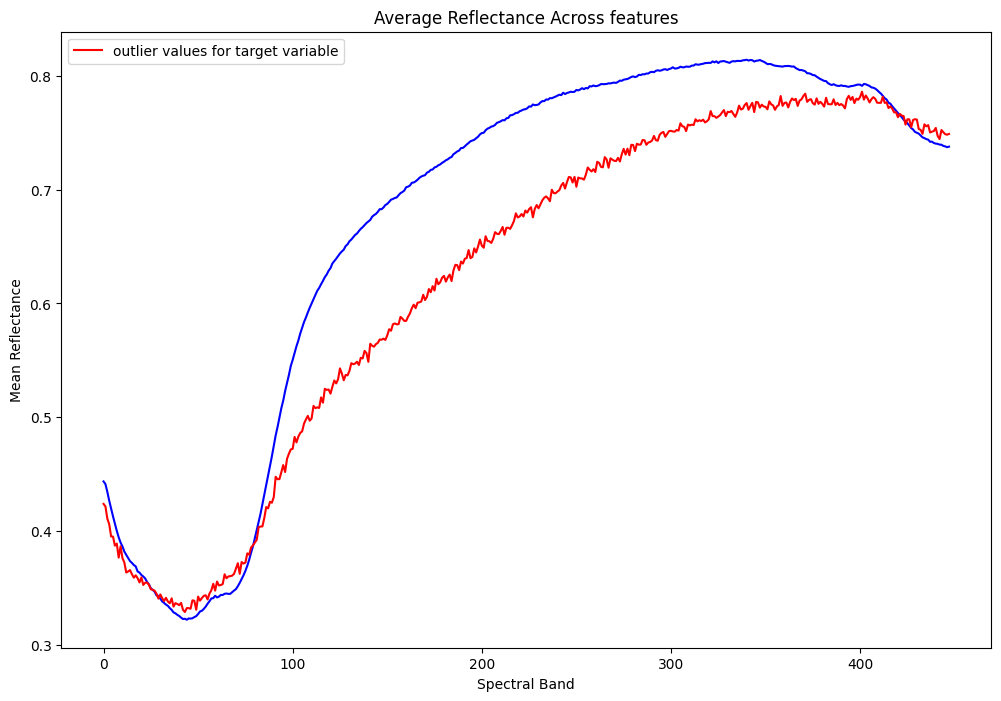

In [18]:
# mean values in the two datasets
plt.figure(figsize = (12,8))

mean_spectrum_normal = data_normal.mean()
mean_spectrum_outlier = data_outlier.mean()
plt.plot(range(len(mean_spectrum_normal)), mean_spectrum_normal, color="blue")
plt.plot(range(len(mean_spectrum_outlier)), mean_spectrum_outlier, color="red", label = "outlier values for target variable")

plt.legend()
plt.xlabel("Spectral Band")
plt.ylabel("Mean Reflectance")
plt.title("Average Reflectance Across features")

- It looks like the outliers values for the target variables do have a different distribution of features. 
- Removing the outliers doesn't seem to be the best position. 

### Dealing with the outliers - 

In [19]:
# instead of removing the outliers, I am going to cap the values to 20,000 

y_capped = np.minimum(y, 20000)

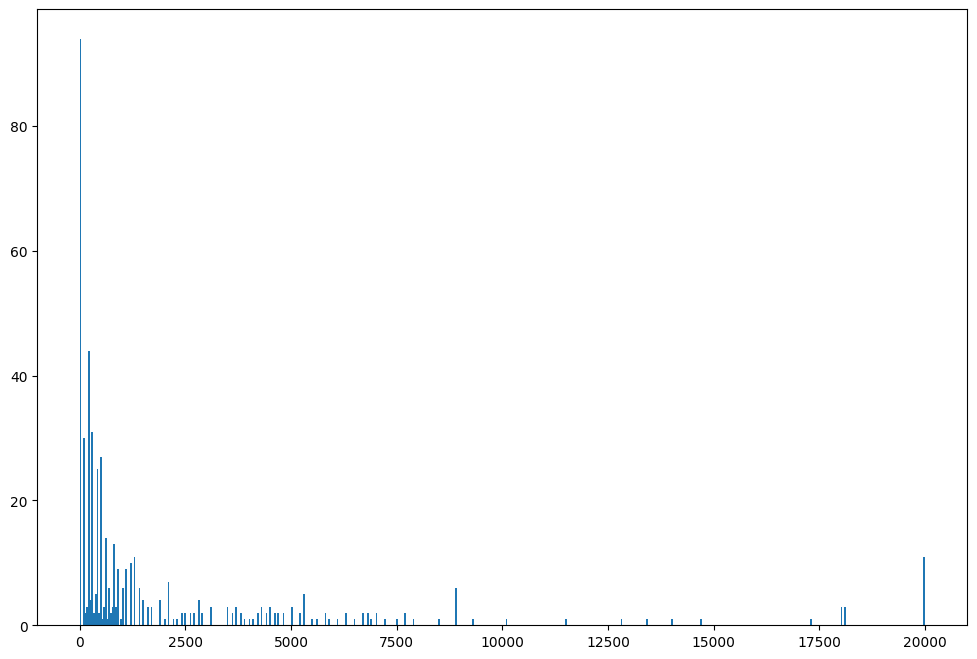

In [20]:
# how the distribution looks now - 

plt.figure(figsize = (12,8))
plt.hist(y_capped, bins=500); plt.show()

### How are the features correlated with the target variable? 

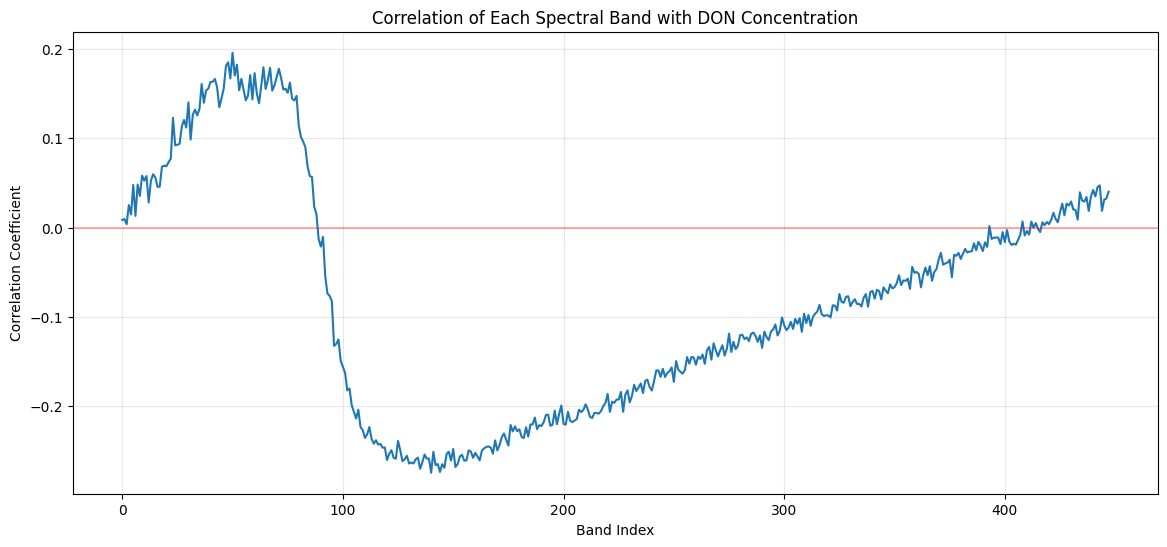

In [21]:
# Correlation of each band with DON concentration
correlations = []
for col in X.columns:
    corr = np.corrcoef(X[col], y_capped)[0, 1]
    correlations.append((col, corr))

# Convert to DataFrame for easier manipulation
corr_df = pd.DataFrame(correlations, columns=['Band', 'Correlation'])
corr_df['Abs_Correlation'] = np.abs(corr_df['Correlation'])

# Plot correlation values across the spectrum
plt.figure(figsize=(14, 6))
plt.plot(range(len(X.columns)), corr_df['Correlation'].values)
plt.title('Correlation of Each Spectral Band with DON Concentration')
plt.xlabel('Band Index')
plt.ylabel('Correlation Coefficient')
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(True, alpha=0.3)
plt.show()

We again see a pattern in the plot above. The features between around 150 have the maximum absolute value of coorelation coeffients. This is verified in the graph below where we take top 20 features with the maximum value of absolute correlation coefficients. 

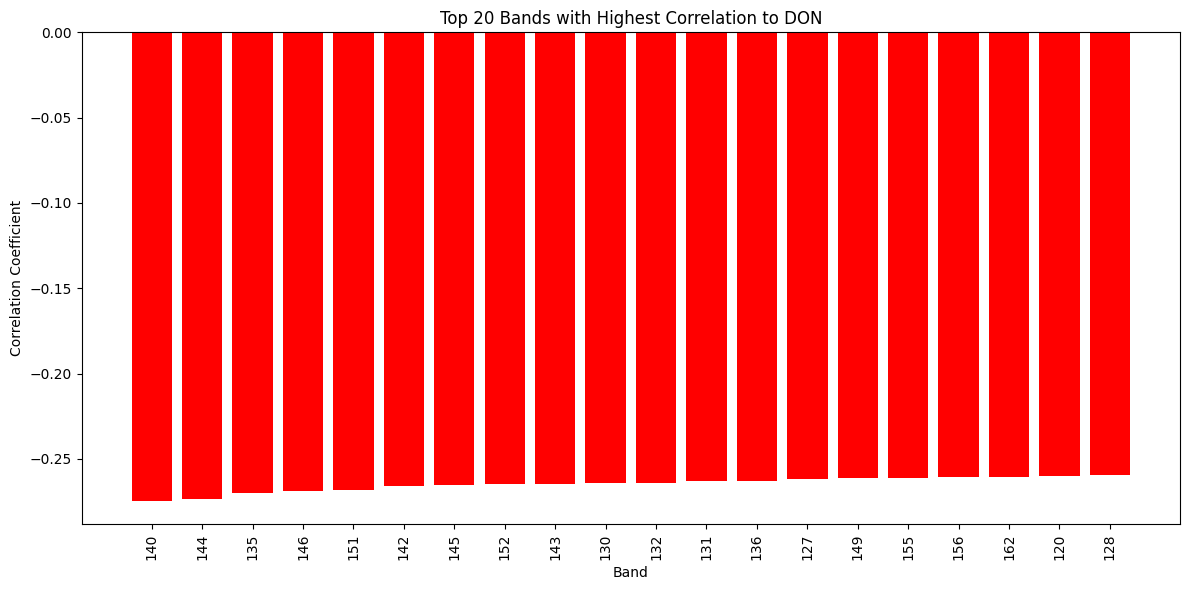

In [22]:
# Plot top 20 bands with highest absolute correlation
top_corr = corr_df.sort_values('Abs_Correlation', ascending=False).head(20)
plt.figure(figsize=(12, 6))
colors = ['green' if x > 0 else 'red' for x in top_corr['Correlation']]
plt.bar(top_corr['Band'], top_corr['Correlation'], color=colors)
plt.title('Top 20 Bands with Highest Correlation to DON')
plt.xlabel('Band')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Preprocessing data

In [25]:
# normalizing the features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# save the scaler, to be used in pre-processing data during prediction
joblib.dump(scaler, 'src/models/scaler.pkl')

['src/models/scaler.pkl']

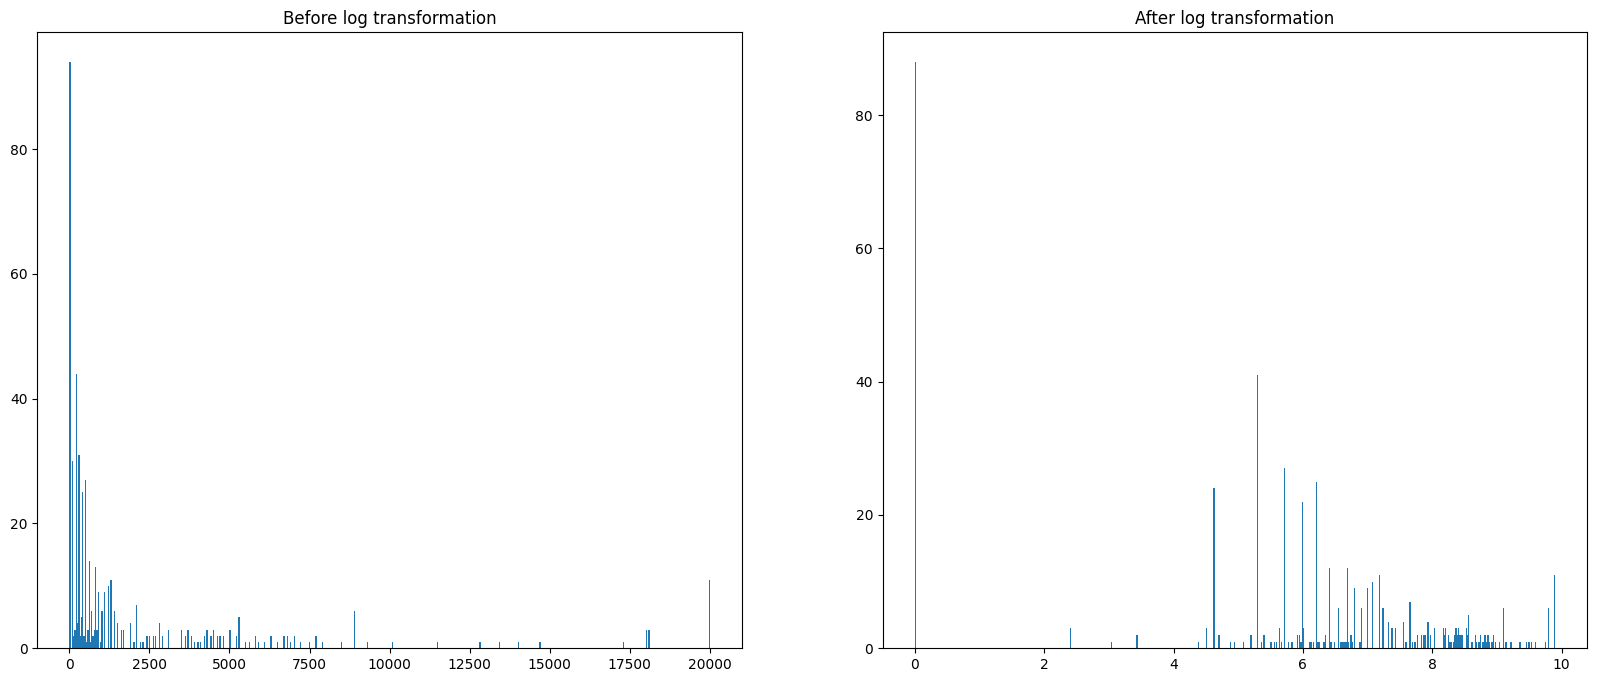

In [26]:
# since the target variable is skewed, and have a large domain. i will be using log transformation on it. 

y_log = np.log1p(y_capped)

plt.figure(figsize = (20,8))
plt.subplot(121)
plt.hist(y_capped, bins=500); 
plt.title("Before log transformation")

plt.subplot(122)
plt.hist(y_log, bins=500); 
plt.title("After log transformation");plt.show()

### Save the processed data 

In [27]:
X_scaled = pd.DataFrame(X_scaled)

X_scaled.to_csv("x_processed.csv", index=False)

In [28]:
y_log = pd.DataFrame(y_log)
y_log.to_csv("y_processed.csv", index=False)